#### Importing the libraries

In [217]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#### Get the data

In [164]:
df = pd.read_csv('hotel_bookings.csv')

In [165]:
df.shape

(119390, 33)

In [166]:
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_month_year              119390 non-null  object 
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

#### Separating the features and target

In [168]:
x = df.drop(['is_canceled'],axis=1)
y = df[['is_canceled']]

#### Checking cancellation rate and data imbalance

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

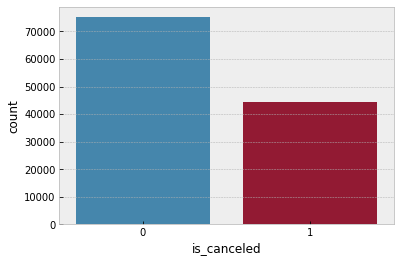

In [169]:
sb.countplot(x=y['is_canceled'])

In [170]:
y['is_canceled'].mean()*100

37.041628277075134

#### Split the numerical and categorical features

In [171]:
cat = x[x.columns[x.dtypes==object]]
num = x[x.columns[x.dtypes!=object]]

In [172]:
cat.shape

(119390, 13)

In [173]:
num.shape

(119390, 19)

In [174]:
num_as_cat=[]
for col in num.columns:
    if(num[col].nunique()<=20):
        num_as_cat.append(col)
    print(f"{col} : {num[col].nunique()}")
print()

lead_time : 479
arrival_date_year : 3
arrival_date_week_number : 53
arrival_date_day_of_month : 31
stays_in_weekend_nights : 17
stays_in_week_nights : 35
adults : 14
children : 5
babies : 5
is_repeated_guest : 2
previous_cancellations : 15
previous_bookings_not_canceled : 73
booking_changes : 21
agent : 333
company : 352
days_in_waiting_list : 128
adr : 8879
required_car_parking_spaces : 5
total_of_special_requests : 6



In [175]:
num_as_cat = x[num_as_cat]

In [176]:
for col in num_as_cat.columns:
    num.drop([col],axis=1,inplace=True)

In [177]:
num.shape

(119390, 10)

In [178]:
num_as_cat.shape

(119390, 9)

In [179]:
for col in cat.columns:
    print(f"{col} : {cat[col].nunique()}")

hotel : 2
arrival_month_year : 26
arrival_date_month : 12
meal : 5
country : 177
market_segment : 8
distribution_channel : 5
reserved_room_type : 10
assigned_room_type : 12
deposit_type : 3
customer_type : 4
reservation_status : 3
reservation_status_date : 926


In [180]:
cat = pd.concat([cat,num_as_cat],axis=1)

In [181]:
num.shape

(119390, 10)

In [182]:
cat.shape

(119390, 22)

#### Operations on Numerical data

In [183]:
num.describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,104.011416,27.165173,15.798241,2.500302,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122
std,106.863097,13.605138,8.780829,1.908286,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000
25%,18.000000,16.000000,8.000000,1.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000
50%,69.000000,28.000000,16.000000,2.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000
75%,160.000000,38.000000,23.000000,3.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000
max,737.000000,53.000000,31.000000,50.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000


###### Checking Missing Values

In [184]:
num.isnull().sum()/len(num)*100

lead_time                          0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_week_nights               0.000000
previous_bookings_not_canceled     0.000000
booking_changes                    0.000000
agent                             13.686238
company                           94.306893
days_in_waiting_list               0.000000
adr                                0.000000
dtype: float64

###### Checking outliers

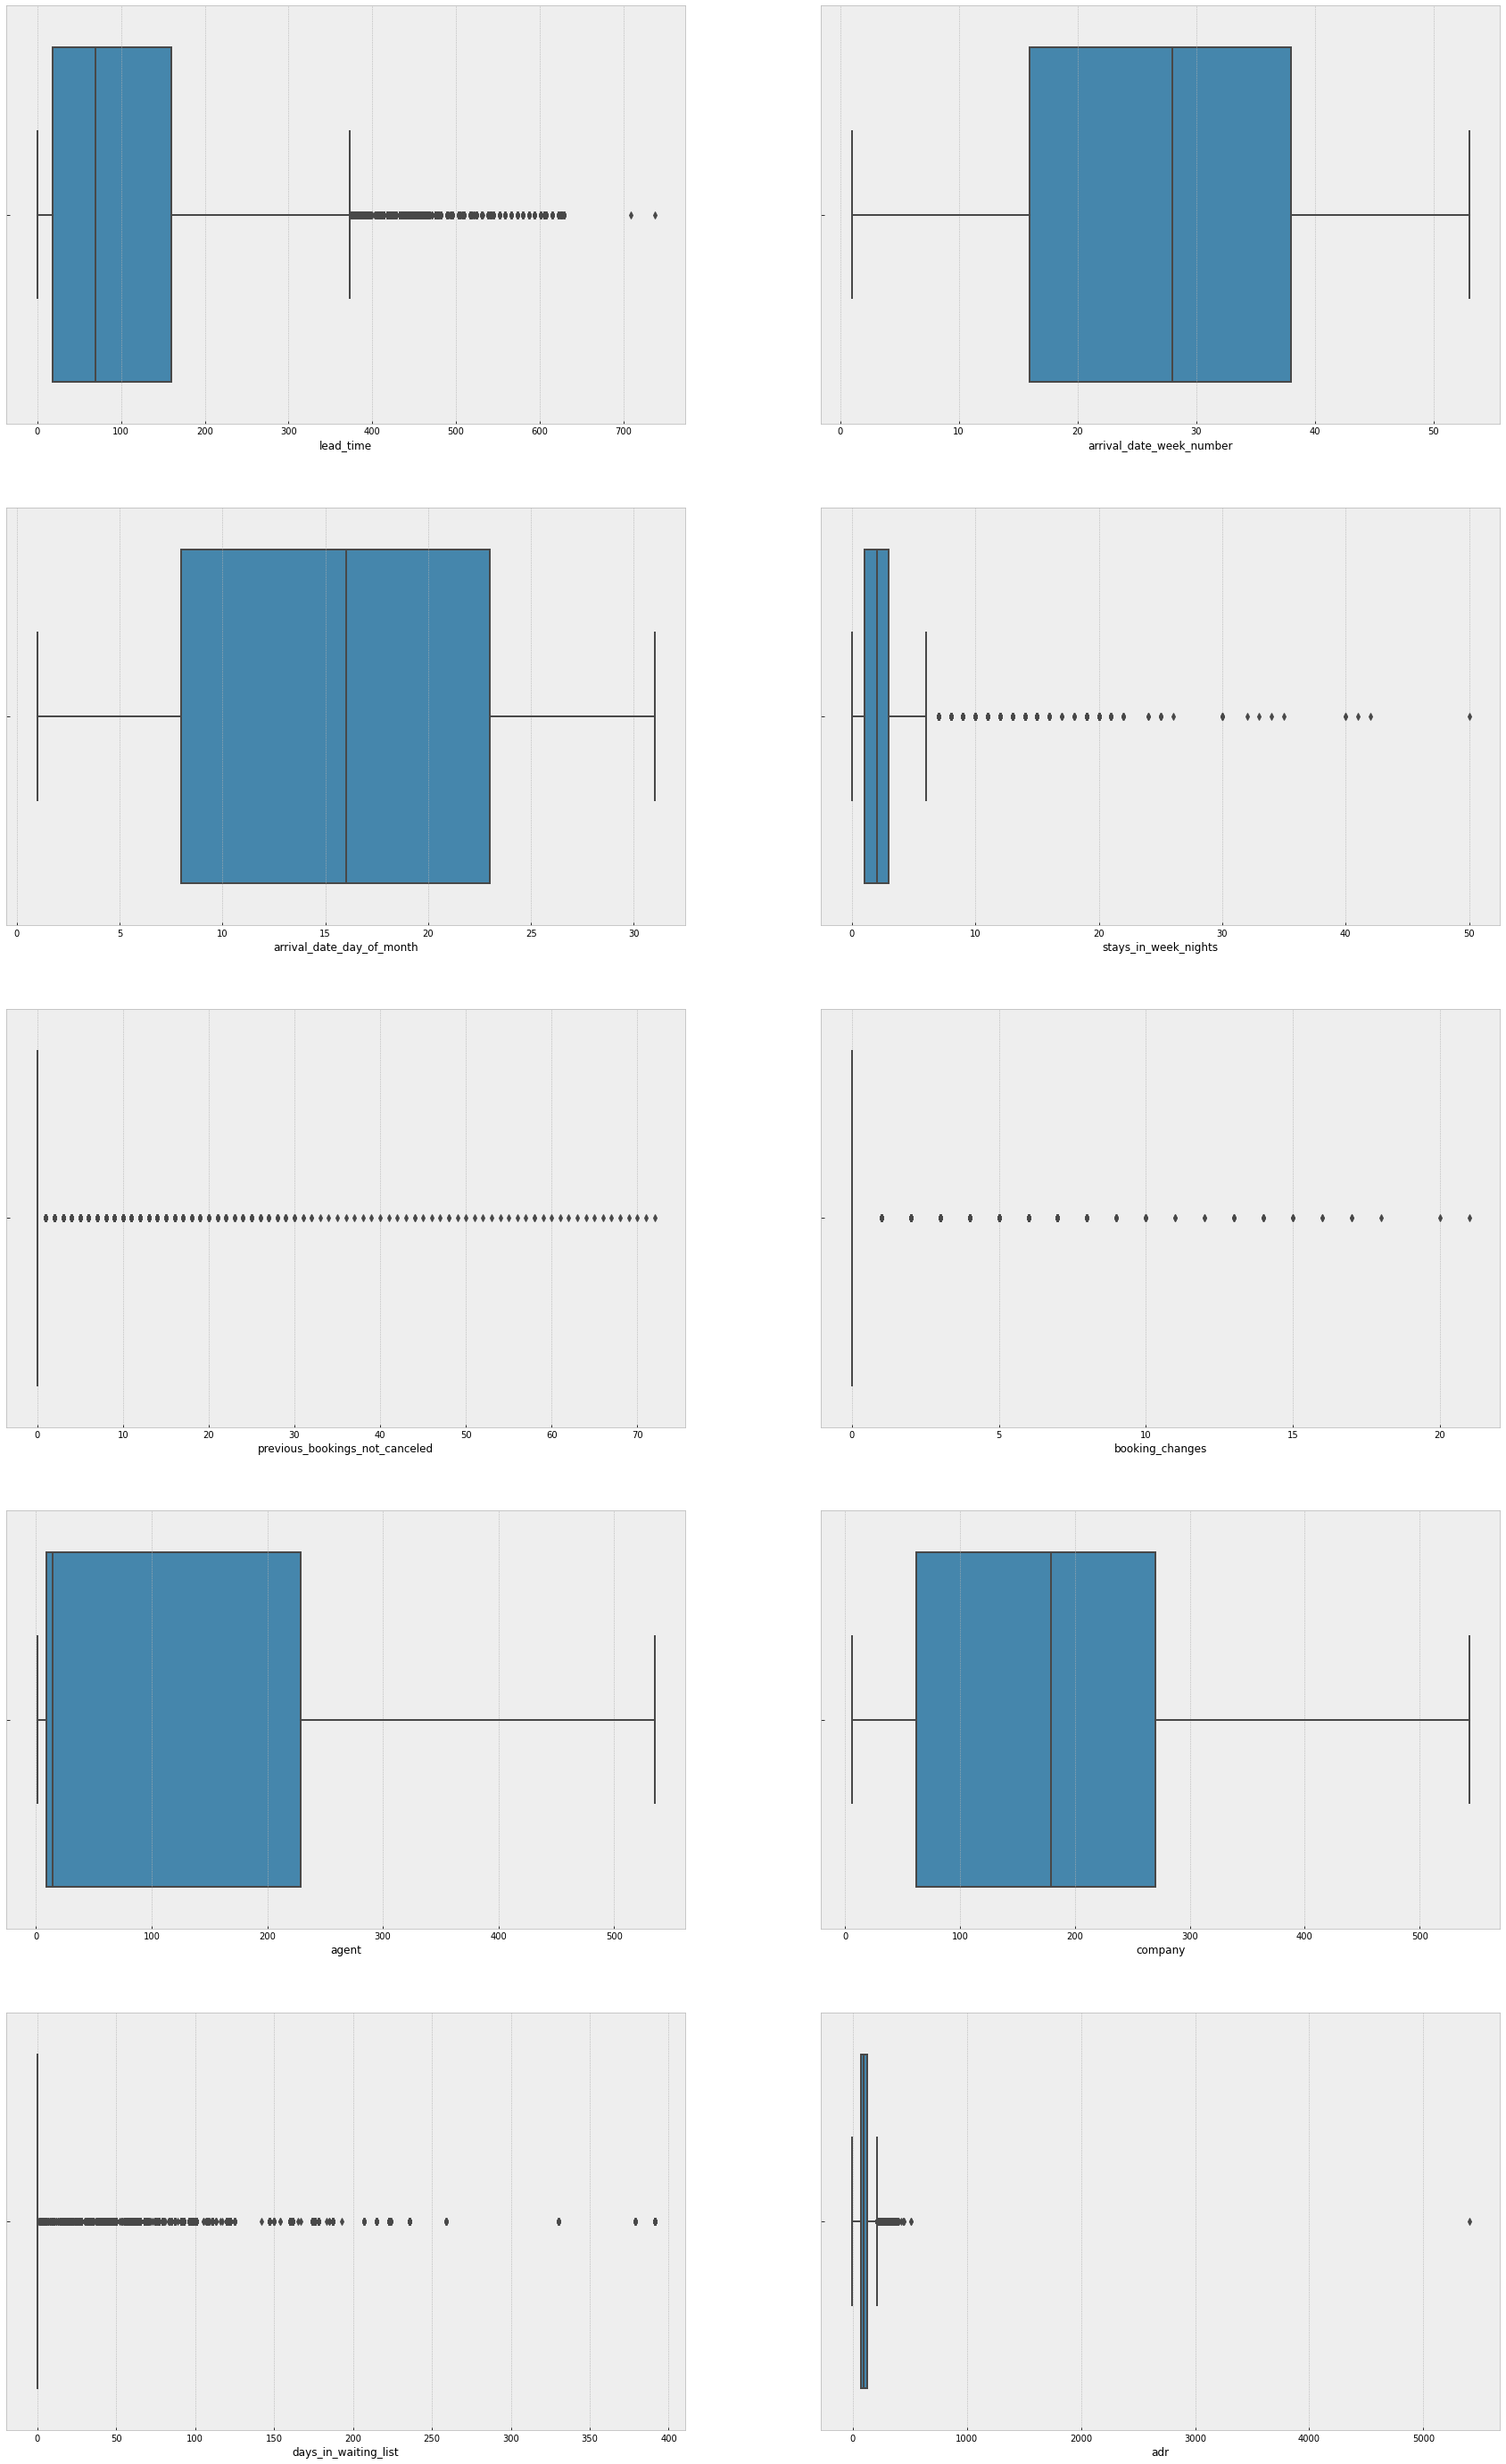

In [185]:
plt.style.use('bmh')
plt.figure(figsize=(30,50))
for i in enumerate(num.columns):
    plt.subplot(5,2,i[0]+1)
    sb.boxplot(x=i[1],data=num)

###### Handling Outliers

In [186]:
def outlier(col):
    Q1 = num[col].quantile(0.25)
    Q3 = num[col].quantile(0.75)
    IQR = Q3-Q1
    LL = Q1-1.5*IQR
    UL = Q3+1.5*IQR
    num[col] = np.where((num[col]>UL),UL,
                     np.where((num[col]<LL),LL,num[col]))

In [187]:
for i in num.columns:
    outlier(i)

###### Remove Company Column as it has lot of missing values

In [188]:
num.drop(['company'],axis=1,inplace=True)

###### Handling missing values

In [189]:
num['agent'] = num['agent'].fillna(num['agent'].mean())

###### Feature selection

In [190]:
rf = RandomForestClassifier()
rf.fit(num,y)

RandomForestClassifier()

In [191]:
pd.DataFrame({"Features":num.columns,"Score":rf.feature_importances_}).sort_values(by='Score',ascending=False)

,Features,Score
0,lead_time,0.304212
8,adr,0.224424
6,agent,0.145945
2,arrival_date_day_of_month,0.135798
1,arrival_date_week_number,0.127511
3,stays_in_week_nights,0.062110
4,previous_bookings_not_canceled,0.000000
5,booking_changes,0.000000
7,days_in_waiting_list,0.000000


In [192]:
num.drop(['previous_bookings_not_canceled','booking_changes','days_in_waiting_list'],axis=1,inplace=True)

In [193]:
num.shape

(119390, 6)

#### Operations on categorical data

In [194]:
cat.head()

,hotel,arrival_month_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,reservation_status_date,arrival_date_year,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,...,01-07-2015,2015,0,2,0.0,0,0,0,0,0
1,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,...,01-07-2015,2015,0,2,0.0,0,0,0,0,0
2,Resort Hotel,July 2015,July,BB,GBR,Direct,Direct,A,C,No Deposit,...,02-07-2015,2015,0,1,0.0,0,0,0,0,0
3,Resort Hotel,July 2015,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,...,02-07-2015,2015,0,1,0.0,0,0,0,0,0
4,Resort Hotel,July 2015,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,03-07-2015,2015,0,2,0.0,0,0,0,0,1


In [195]:
cat.drop(['arrival_month_year'],axis=1,inplace=True)

###### Cat columns and their unique values

In [196]:
for col in cat.columns:
    print(f"{col} : {cat[col].unique()}")
    print("-----------------------------------------------------------------------------------------------------------")

hotel : ['Resort Hotel' 'City Hotel']
-----------------------------------------------------------------------------------------------------------
arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
-----------------------------------------------------------------------------------------------------------
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
-----------------------------------------------------------------------------------------------------------
country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV'

In [197]:
cat['reservation_status_date'] = pd.to_datetime(cat['reservation_status_date'])

In [198]:
cat['reservation_status_year'] = cat['reservation_status_date'].dt.year
cat['reservation_status_month'] = cat['reservation_status_date'].dt.month
cat['reservation_status_day'] = cat['reservation_status_date'].dt.day

In [199]:
cat.shape

(119390, 24)

In [200]:
cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests,reservation_status_year,reservation_status_month,reservation_status_day
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,...,2,0.0,0,0,0,0,0,2015,1,7
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,...,2,0.0,0,0,0,0,0,2015,1,7
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,...,1,0.0,0,0,0,0,0,2015,2,7
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,...,1,0.0,0,0,0,0,0,2015,2,7
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,...,2,0.0,0,0,0,0,1,2015,3,7


In [201]:
cat.drop(['reservation_status_date'],axis=1,inplace=True)

In [202]:
for col in cat.columns:
    print(f"{col} : {cat[col].unique()}")
    print("-----------------------------------------------------------------------------------------------------------")

hotel : ['Resort Hotel' 'City Hotel']
-----------------------------------------------------------------------------------------------------------
arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
-----------------------------------------------------------------------------------------------------------
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
-----------------------------------------------------------------------------------------------------------
country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV'

###### Checking missing values

In [203]:
cat.isnull().sum()/len(cat)*100

hotel                          0.000000
arrival_date_month             0.000000
meal                           0.000000
country                        0.408744
market_segment                 0.000000
distribution_channel           0.000000
reserved_room_type             0.000000
assigned_room_type             0.000000
deposit_type                   0.000000
customer_type                  0.000000
reservation_status             0.000000
arrival_date_year              0.000000
stays_in_weekend_nights        0.000000
adults                         0.000000
children                       0.003350
babies                         0.000000
is_repeated_guest              0.000000
previous_cancellations         0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
reservation_status_year        0.000000
reservation_status_month       0.000000
reservation_status_day         0.000000
dtype: float64

In [204]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat['country'] = imp.fit_transform(cat[['country']])

In [205]:
cat['children'] = imp.fit_transform(cat[['children']])

###### Encoding the categorical variables

In [206]:
le = cat[['hotel','deposit_type','reservation_status']]
oh = cat[['arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','customer_type']]

In [207]:
enc = LabelEncoder()
for col in le.columns:
    cat[col] = enc.fit_transform(cat[col])

In [208]:
ohe = OneHotEncoder()
for col in oh.columns:
    X=ohe.fit_transform(cat[col].values.reshape(-1,1)).toarray()
    onehotdf = pd.DataFrame(X,columns=[i for i in cat[col].unique()])
    onehotdf.drop(onehotdf.columns[0], axis=1,inplace=True)
    cat = pd.concat([cat, onehotdf], axis=1)
    cat= cat.drop([col], axis=1)

In [209]:
cat.shape

(119390, 240)

###### Feature Importance

In [210]:
rf.fit(cat,y)

RandomForestClassifier()

In [211]:
cat_feature = pd.DataFrame({"Features":cat.columns,"Score":rf.feature_importances_}).sort_values(by='Score',ascending=False)

In [212]:
cat_feature[cat_feature['Score']==0]

,Features,Score
161,MCO,0.0
166,BEN,0.0
172,GLP,0.0
69,CHL,0.0


In [213]:
cat.drop(['GLP','MCO','BEN','CHL'],axis=1,inplace=True)

In [214]:
cat.shape

(119390, 236)

###### Final dataset

In [215]:
new_data = pd.concat([num,cat],axis=1)

#### Feature Scaling

In [216]:
scaler = StandardScaler()
new_data = scaler.fit_transform(new_data)

#### Model building

#### Logistic regression

In [219]:
x_train,x_test,y_train,y_test = train_test_split(new_data,y,test_size=0.2,random_state=42)

In [220]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [224]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [225]:
print_score(log_reg, x_train, y_train, x_test, y_test, train=True)
print_score(log_reg, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 98.89%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.984071      0.997497  0.988902      0.990784      0.989027
recall         0.998573      0.972371  0.988902      0.985472      0.988902
f1-score       0.991269      0.984774  0.988902      0.988022      0.988872
support    60259.000000  35253.000000  0.988902  95512.000000  95512.000000
_______________________________________________
Confusion Matrix: 
 [[60173    86]
 [  974 34279]]

Test Result:
Accuracy Score: 98.93%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.984396     0.997830  0.989321      0.991113      0.989443
recall         0.998725     0.973693  0.989321      0.986209      0.989321
f1-score       0.991509     0.985614  0.989321      0.988561      0.989294
suppo